In [1]:
import os
import sys
import time
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV


In [2]:
df = pd.read_csv('/content/Wine.csv')

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.isnull().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [7]:
df['Customer_Segment'].value_counts()

,count
Customer_Segment,
2,71
1,59
3,48


In [8]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [12]:
len(x_train),len(y_train)

(142, 142)

In [13]:
len(x_test),len(y_test)

(36, 36)

In [14]:
x_train.sample(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
58,13.72,1.43,2.50,16.7,108,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285
56,14.22,1.70,2.30,16.3,118,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970
85,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450


In [16]:
def visualization_eda(X_train,var):
  print(var)
  plt.figure(figsize=(12,3))
  plt.subplot(1,3,1)
  plt.title('Normal Distribution')
  X_train[var].plot(kind='kde',color='r')
  plt.subplot(1,3,2)
  plt.title('Outliers')
  sns.boxplot(x = X_train[var])
  plt.subplot(1,3,3)
  plt.title('probplot')
  stats.probplot(X_train[var],dist='norm',plot=plt)
  plt.show()

Alcohol


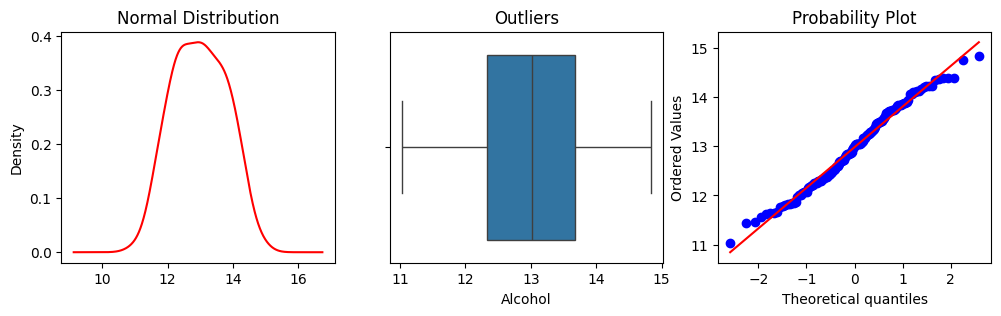

Malic_Acid


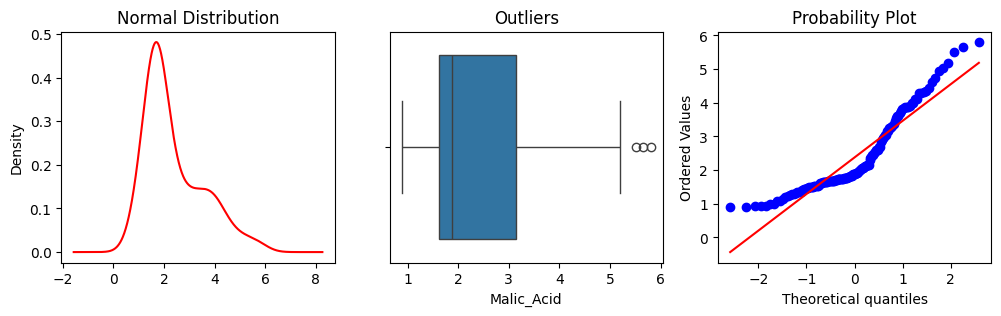

Ash


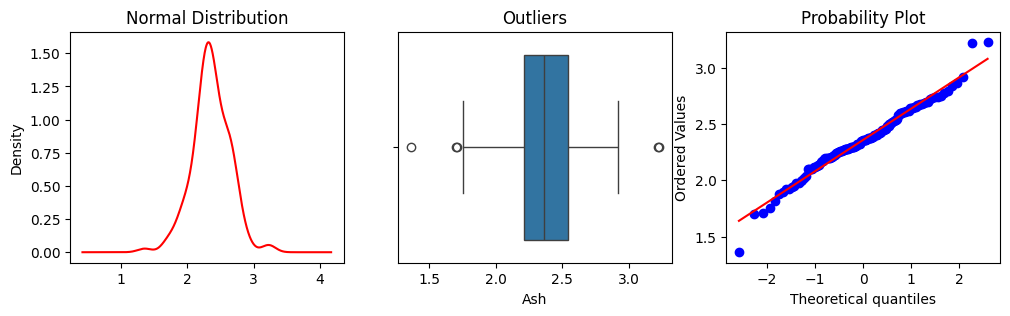

Ash_Alcanity


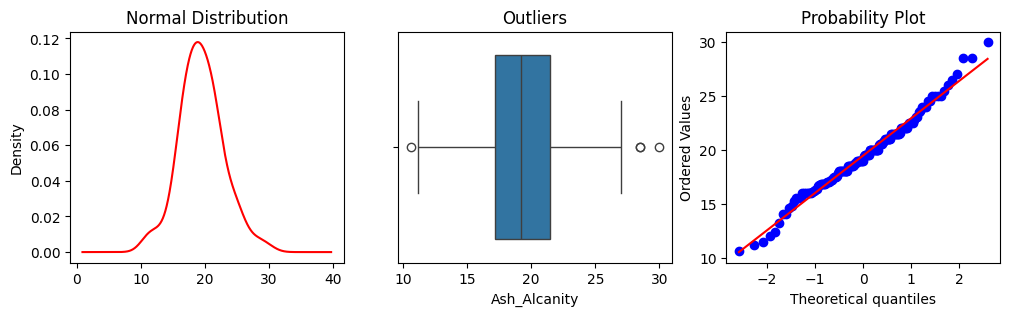

Magnesium


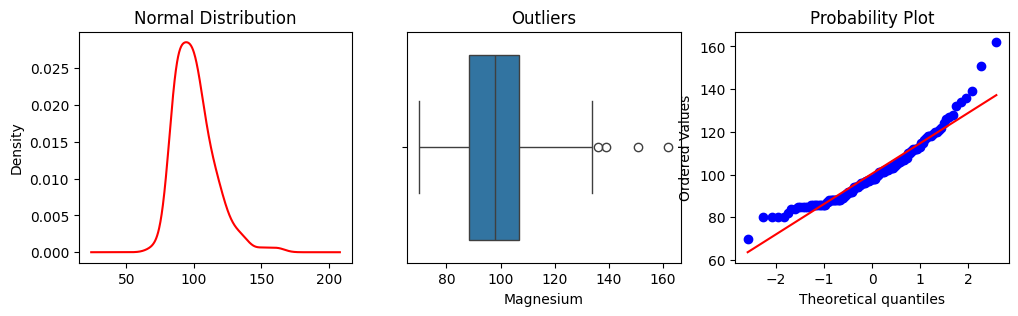

Total_Phenols


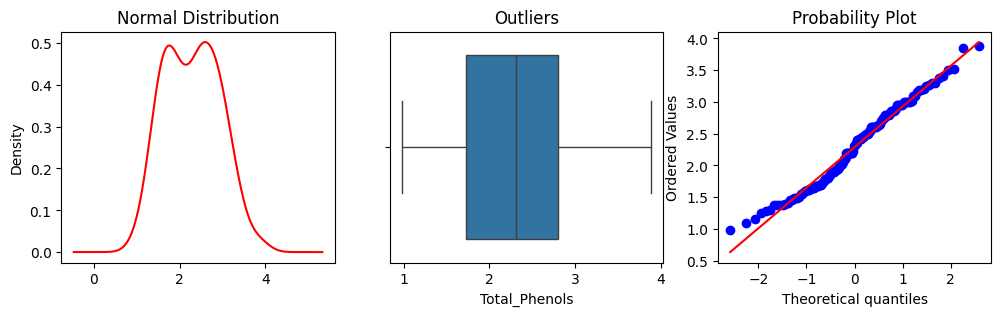

Flavanoids


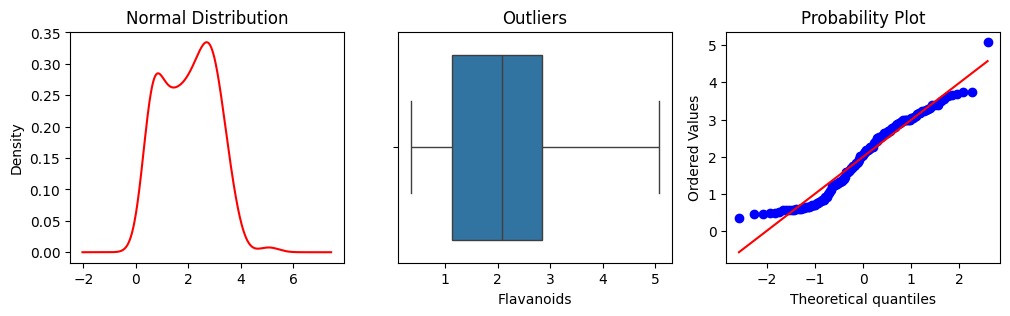

Nonflavanoid_Phenols


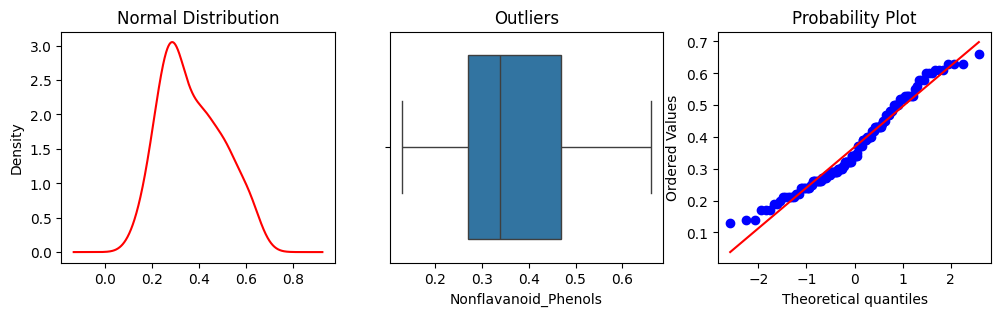

Proanthocyanins


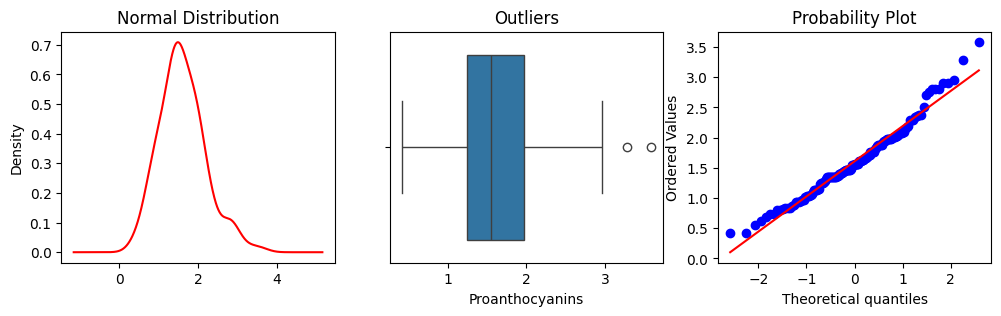

Color_Intensity


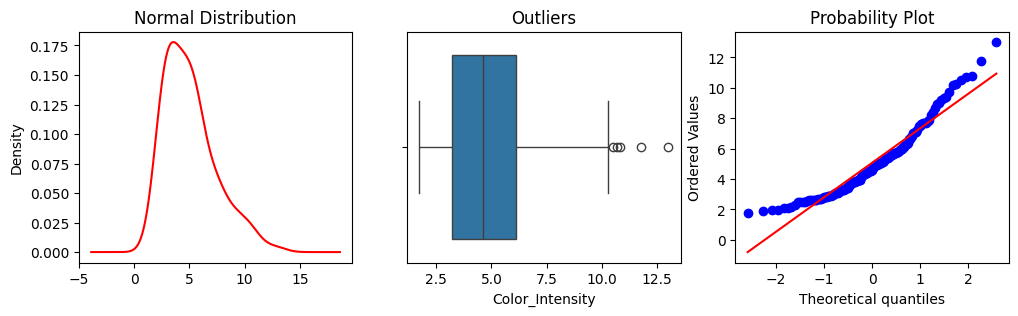

Hue


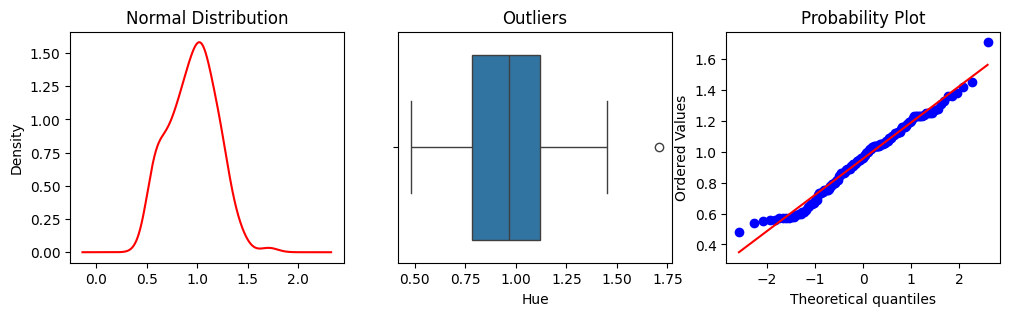

OD280


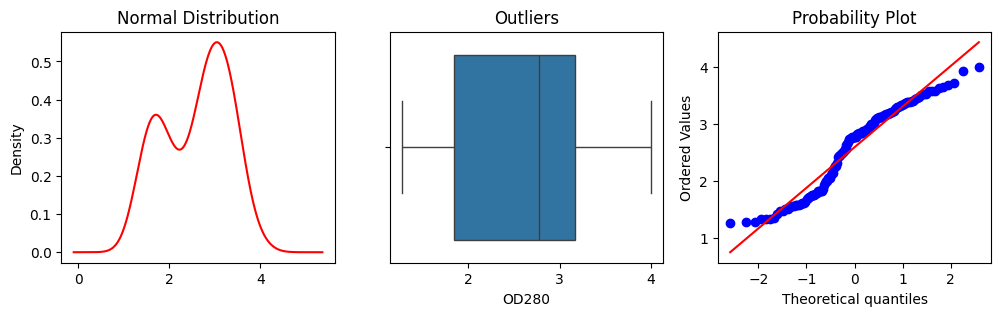

Proline


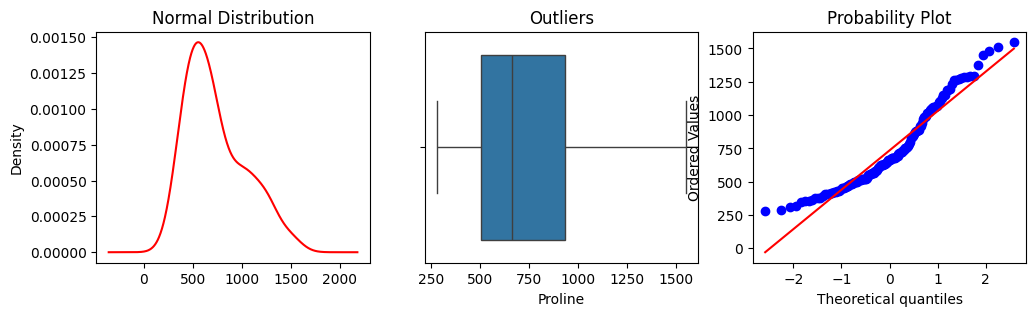

In [18]:
for i in x_train.columns:
  visualization_eda(x_train,i)

In [19]:
x_train.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
158,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660
137,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515
98,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660
159,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620
38,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020


In [20]:
# while checking each column outliers
def outlier_checking(X_train,var):
  print(var)
  plt.figure(figsize=(12,3))
  plt.subplot(1,3,1)
  plt.title('Normal Distribution')
  X_train[var].plot(kind='kde',color='r')
  plt.subplot(1,3,2)
  plt.title('Outliers')
  sns.boxplot(x = X_train[var])
  plt.show()


Alcohol


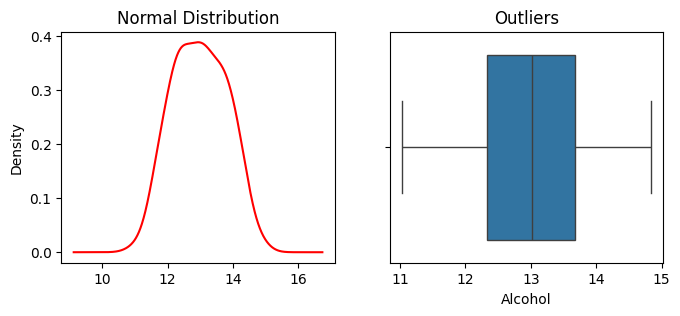

Malic_Acid


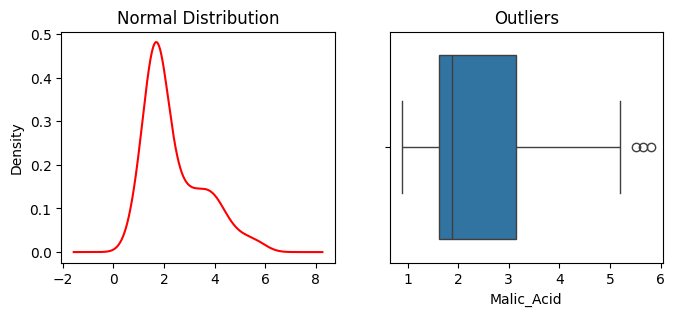

Ash


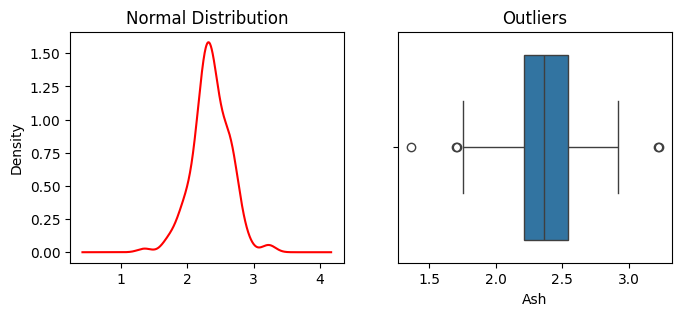

Ash_Alcanity


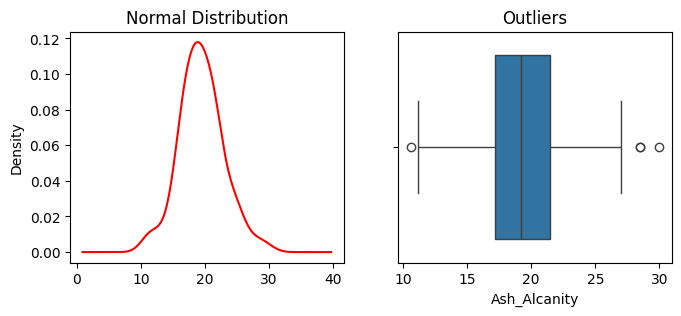

Magnesium


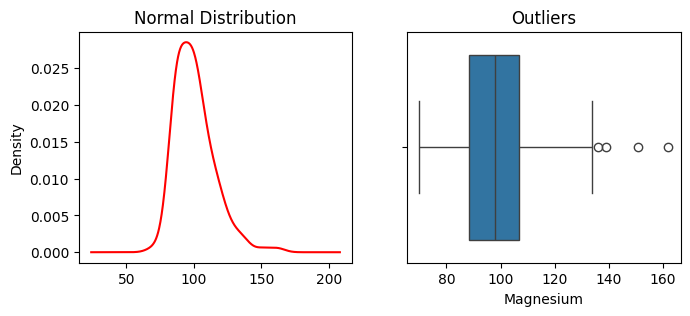

Total_Phenols


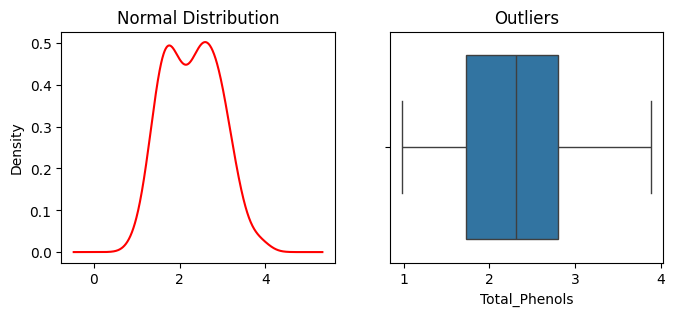

Flavanoids


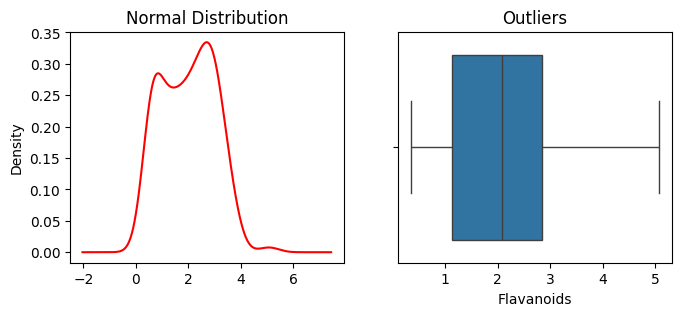

Nonflavanoid_Phenols


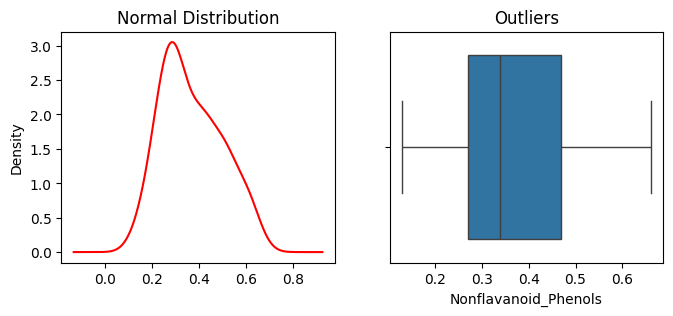

Proanthocyanins


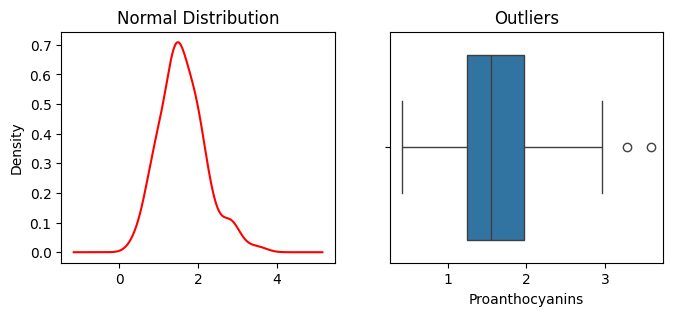

Color_Intensity


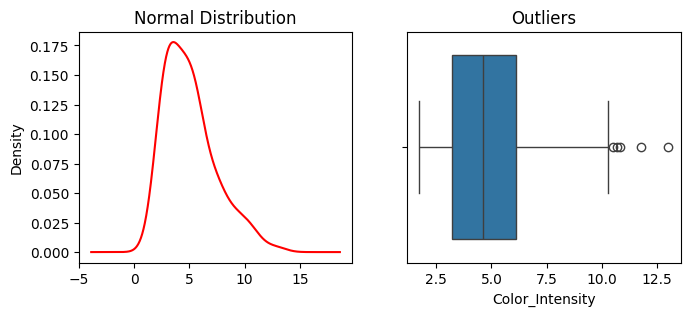

Hue


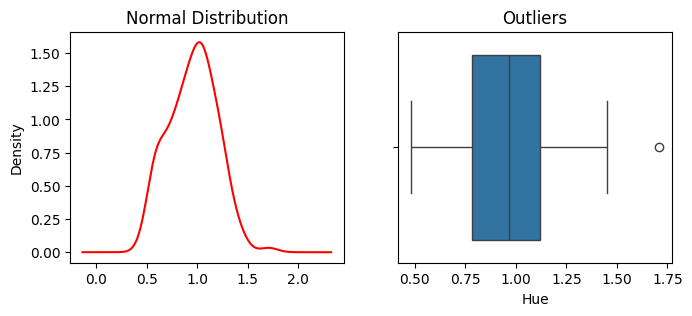

OD280


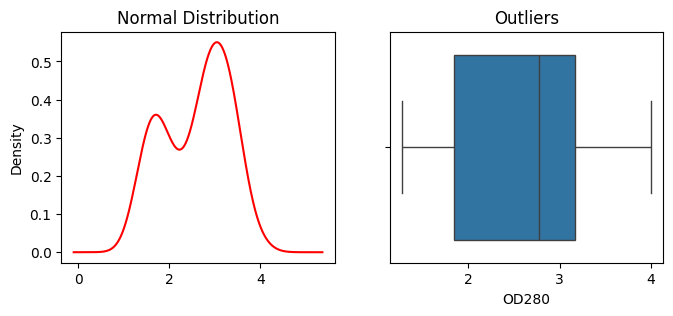

Proline


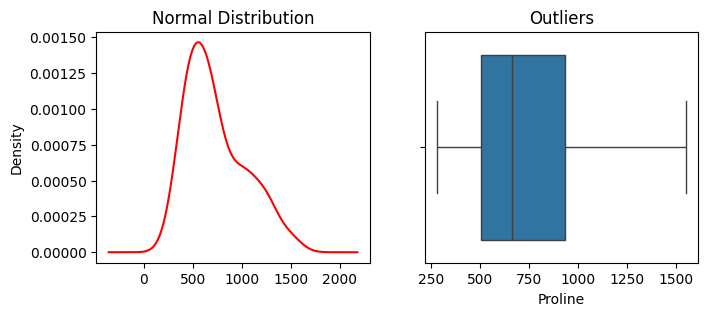

In [22]:
for i in x_train.columns:
  outlier_checking(x_train,i)


In [23]:
x_train.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
158,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660
137,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515
98,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660
159,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620
38,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020


In [24]:
x_test.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845
45,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080
140,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600
30,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510


In [25]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

target_train = pd.DataFrame({'y_train_con':y_train_encoded})
target_test = pd.DataFrame({'y_test_con':y_test_encoded})


In [26]:

target_train

,y_train_con
0,2
1,2
2,1
3,2
4,0
...,...
137,1
138,1
139,0
140,1


In [27]:
len(x_train.columns)

13

In [30]:
 #constant technique = variance 0
 con_tech = VarianceThreshold(threshold=0.0)
con_tech.fit(x_train)
x_train.columns[con_tech.get_support()]


Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [32]:
constant = x_train.columns[~con_tech.get_support()]

len(constant)

0

In [33]:

# Quasi constant = variance 0.1
con_tech = VarianceThreshold(threshold=0.1)
con_tech.fit(x_train)
x_train.columns[con_tech.get_support()]
constant = x_train.columns[~con_tech.get_support()]

constant

Index(['Ash', 'Nonflavanoid_Phenols', 'Hue'], dtype='object')

In [34]:
#hypothesis testing
co_pval = []
for i in x_train.columns:
    co_pval.append(stats.pearsonr(x_train[i], target_train['y_train_con']))

co_pval

[PearsonRResult(statistic=-0.3088926412800061, pvalue=0.00018384631706672814),
 PearsonRResult(statistic=0.45712209355141875, pvalue=1.0740749785521164e-08),
 PearsonRResult(statistic=-0.039487056235683625, pvalue=0.64081066956239),
 PearsonRResult(statistic=0.5197278410469516, pvalue=3.4051946921192106e-11),
 PearsonRResult(statistic=-0.21518612821304736, pvalue=0.01011783326225532),
 PearsonRResult(statistic=-0.6900353712196982, pvalue=2.1403333492906568e-21),
 PearsonRResult(statistic=-0.8422017594822807, pvalue=2.1988426779310915e-39),
 PearsonRResult(statistic=0.47692081384257173, pvalue=1.9703451442295083e-09),
 PearsonRResult(statistic=-0.49067520709992224, pvalue=5.683144886094535e-10),
 PearsonRResult(statistic=0.3067609948170058, pvalue=0.00020473423418443447),
 PearsonRResult(statistic=-0.6104277623853445, pvalue=7.319922148120738e-16),
 PearsonRResult(statistic=-0.7977940231752658, pvalue=1.4516245969651153e-32),
 PearsonRResult(statistic=-0.6231314728468477, pvalue=1.22145

In [35]:
co_pval = np.array(co_pval) # to target only p_value
co_pval

array([[-3.08892641e-01,  1.83846317e-04],
       [ 4.57122094e-01,  1.07407498e-08],
       [-3.94870562e-02,  6.40810670e-01],
       [ 5.19727841e-01,  3.40519469e-11],
       [-2.15186128e-01,  1.01178333e-02],
       [-6.90035371e-01,  2.14033335e-21],
       [-8.42201759e-01,  2.19884268e-39],
       [ 4.76920814e-01,  1.97034514e-09],
       [-4.90675207e-01,  5.68314489e-10],
       [ 3.06760995e-01,  2.04734234e-04],
       [-6.10427762e-01,  7.31992215e-16],
       [-7.97794023e-01,  1.45162460e-32],
       [-6.23131473e-01,  1.22145495e-16]])

<Axes: >

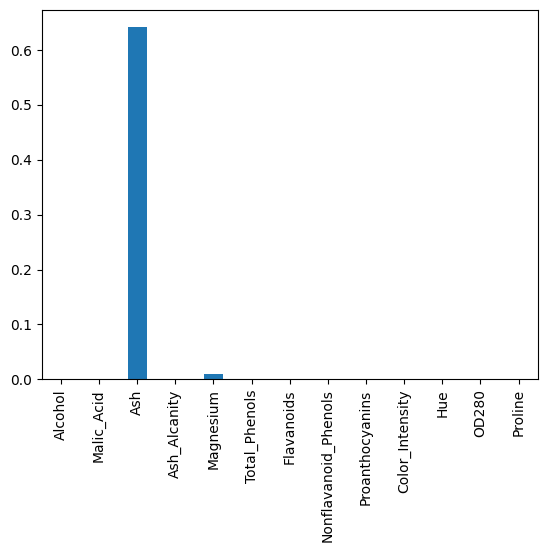

In [37]:

s = pd.Series(data = co_pval[: , 1],index = x_train.columns) # to get each column p_value
s.plot.bar()

In [38]:
co_pval[: , 1]

array([1.83846317e-04, 1.07407498e-08, 6.40810670e-01, 3.40519469e-11,
       1.01178333e-02, 2.14033335e-21, 2.19884268e-39, 1.97034514e-09,
       5.68314489e-10, 2.04734234e-04, 7.31992215e-16, 1.45162460e-32,
       1.22145495e-16])

In [40]:
x_train=x_train.drop(['Ash'],axis=1)

In [41]:
x_train.columns

Index(['Alcohol', 'Malic_Acid', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols',
       'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins',
       'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [42]:
y_train.value_counts()

,count
Customer_Segment,
2,57
1,45
3,40


In [43]:

# standard_scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
res = sc.transform(x_train)

#res -> to give scaled down outputs

scaled_x_train = pd.DataFrame(data=res)
scaled_x_train.columns = x_train.columns

scaled_x_train.head()

,Alcohol,Malic_Acid,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.665293,-0.608406,1.605400,-0.167384,0.804002,-0.691678,1.267226,1.877540,3.419473,-1.656329,-0.879409,-0.248606
1,-0.549525,2.751541,1.605400,-0.304379,-0.785384,-1.401233,2.049600,-0.873505,-0.024801,-0.584633,-1.254621,-0.729922
2,-0.745310,-1.143541,-0.282704,-0.852357,1.937029,1.746791,-1.001659,0.587987,-0.240068,0.358460,0.246227,-0.248606
3,0.612948,-0.617179,0.879206,-0.783860,0.489272,-0.901547,1.188988,1.172585,2.881305,-1.656329,-1.129550,-0.381383
4,0.111249,-0.766315,-1.154137,-0.167384,0.174542,0.637487,-0.688710,-0.409266,-0.584496,0.958609,0.135053,0.946386


In [44]:

# to apply same thing on test data
x_test=x_test.drop(['Ash'],axis=1)
res = sc.transform(x_test)

scaled_x_test = pd.DataFrame(data=res)
scaled_x_test.columns = x_test.columns

scaled_x_test.head()

,Alcohol,Malic_Acid,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.808733,0.637319,-1.241280,1.065567,0.646637,1.027242,-1.549321,0.089361,0.018252,0.015517,1.066134,0.365487
1,1.506217,1.461953,-0.166513,0.723081,0.882684,0.647481,-0.532235,-0.615595,0.078527,-0.370294,1.024444,1.145552
2,-0.060063,0.382910,0.443490,-0.304379,-1.178796,-1.501170,1.267226,-1.475296,-0.197015,-0.798972,-0.393023,-0.447771
3,0.918862,-0.766315,0.879206,0.038108,1.118731,1.247104,-0.610472,1.327331,0.276573,1.001477,0.162846,1.826033
4,-0.745310,-1.055814,0.036821,-1.537330,-0.281816,-0.002111,-0.766947,-0.976669,-0.162572,0.701402,1.232895,-0.746519


In [ ]:
# Data is ready
# Train the all Classification algorithms


In [45]:
def knn_algo(x_train,y_train,x_test,y_test):
  knn_res = KNeighborsClassifier(n_neighbors=5) # default k_value is 5
  knn_res.fit(x_train,y_train)
  y_test_pred = knn_res.predict(x_test)
  print(f'Training Accuracy : {knn_res.score(x_train,y_train)}')
  print(f'Test Accuracy : {knn_res.score(x_test,y_test)}')

  print(f'Confusion Matrix Test data : {confusion_matrix(y_test,y_test_pred)}')
  print(f'classification Report Test data : {classification_report(y_test,y_test_pred)}')


In [46]:
def naive_bayes_algo(x_train,y_train,x_test,y_test):
  nav_res = GaussianNB()
  nav_res.fit(x_train,y_train)
  y_test_pred = nav_res.predict(x_test)
  print(f'Training Accuracy : {nav_res.score(x_train,y_train)}')
  print(f'Test Accuracy : {nav_res.score(x_test,y_test)}')

  print(f'Confusion Matrix Test data : {confusion_matrix(y_test,y_test_pred)}')
  print(f'classification Report Test data : {classification_report(y_test,y_test_pred)}')


In [47]:
def log_reg_algo(x_train,y_train,x_test,y_test):
  lg_res = LogisticRegression()
  lg_res.fit(x_train,y_train)
  y_test_pred = lg_res.predict(x_test)
  print(f'Training Accuracy : {lg_res.score(x_train,y_train)}')
  print(f'Test Accuracy : {lg_res.score(x_test,y_test)}')

  print(f'Confusion Matrix Test data : {confusion_matrix(y_test,y_test_pred)}')
  print(f'classification Report Test data : {classification_report(y_test,y_test_pred)}')


In [48]:

def dt_algo(x_train,y_train,x_test,y_test):
  dt_res = DecisionTreeClassifier(criterion='entropy')
  dt_res.fit(x_train,y_train)
  y_test_pred = dt_res.predict(x_test)
  print(f'Training Accuracy : {dt_res.score(x_train,y_train)}')
  print(f'Test Accuracy : {dt_res.score(x_test,y_test)}')

  print(f'Confusion Matrix Test data : {confusion_matrix(y_test,y_test_pred)}')
  print(f'classification Report Test data : {classification_report(y_test,y_test_pred)}')



In [49]:
def rf_algo(x_train,y_train,x_test,y_test):
  rf_res = RandomForestClassifier(criterion='entropy',n_estimators=11)
  rf_res.fit(x_train,y_train)
  y_test_pred = rf_res.predict(x_test)
  print(f'Training Accuracy : {rf_res.score(x_train,y_train)}')
  print(f'Test Accuracy : {rf_res.score(x_test,y_test)}')

  print(f'Confusion Matrix Test data : {confusion_matrix(y_test,y_test_pred)}')
  print(f'classification Report Test data : {classification_report(y_test,y_test_pred)}')


In [50]:
def common(x_train,y_train,x_test,y_test):
  print('-----knn-------')
  knn_algo(x_train,y_train,x_test,y_test)
  print('-----Naive Bayes------')
  naive_bayes_algo(x_train,y_train,x_test,y_test)
  print('-----Logistic Regression-------')
  log_reg_algo(x_train,y_train,x_test,y_test)
  print('-----Decision Tree-------')
  dt_algo(x_train,y_train,x_test,y_test)
  print('-----Random Forest-------')
  rf_algo(x_train,y_train,x_test,y_test)


In [51]:
from sklearn.metrics import precision_score

# Define KNN algorithm
def knn_algo(x_train, y_train, x_test, y_test):
    knn_res = KNeighborsClassifier(n_neighbors=5)
    knn_res.fit(x_train, y_train)
    y_test_pred = knn_res.predict(x_test)
    precision = precision_score(y_test, y_test_pred, average='macro')
    print(f'Training Accuracy : {knn_res.score(x_train, y_train)}')
    print(f'Test Accuracy : {knn_res.score(x_test, y_test)}')
    print(f'Confusion Matrix Test data :\n{confusion_matrix(y_test, y_test_pred)}')
    print(f'Classification Report Test data :\n{classification_report(y_test, y_test_pred)}')
    return precision

# Define other algorithms similarly
def naive_bayes_algo(x_train, y_train, x_test, y_test):
    nb = GaussianNB()
    nb.fit(x_train, y_train)
    y_test_pred = nb.predict(x_test)
    precision = precision_score(y_test, y_test_pred, average='macro')
    print(f'Training Accuracy : {nb.score(x_train,y_train)}')
    print(f'Test Accuracy : {nb.score(x_test,y_test)}')

    print(f'Confusion Matrix Test data : {confusion_matrix(y_test,y_test_pred)}')
    print(f'classification Report Test data : {classification_report(y_test,y_test_pred)}')

    return precision

def log_reg_algo(x_train, y_train, x_test, y_test):
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    y_test_pred = lr.predict(x_test)
    precision = precision_score(y_test, y_test_pred, average='macro')
    print(f'Training Accuracy : {lr.score(x_train,y_train)}')
    print(f'Test Accuracy : {lr.score(x_test,y_test)}')

    print(f'Confusion Matrix Test data : {confusion_matrix(y_test,y_test_pred)}')
    print(f'classification Report Test data : {classification_report(y_test,y_test_pred)}')
    return precision

def dt_algo(x_train, y_train, x_test, y_test):
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    y_test_pred = dt.predict(x_test)
    precision = precision_score(y_test, y_test_pred, average='macro')
    print(f'Training Accuracy : {dt.score(x_train,y_train)}')
    print(f'Test Accuracy : {dt.score(x_test,y_test)}')

    print(f'Confusion Matrix Test data : {confusion_matrix(y_test,y_test_pred)}')
    print(f'classification Report Test data : {classification_report(y_test,y_test_pred)}')
    return precision

def rf_algo(x_train, y_train, x_test, y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    y_test_pred = rf.predict(x_test)
    precision = precision_score(y_test, y_test_pred, average='macro')
    print(f'Training Accuracy : {rf.score(x_train,y_train)}')
    print(f'Test Accuracy : {rf.score(x_test,y_test)}')

    print(f'Confusion Matrix Test data : {confusion_matrix(y_test,y_test_pred)}')
    print(f'classification Report Test data : {classification_report(y_test,y_test_pred)}')
    return precision

# Common function to find the best precision
def common(x_train, y_train, x_test, y_test):
    precisions = {}

    print('-----KNN-------')
    precisions['KNN'] = knn_algo(x_train, y_train, x_test, y_test)

    print('-----Naive Bayes------')
    precisions['Naive Bayes'] = naive_bayes_algo(x_train, y_train, x_test, y_test)

    print('-----Logistic Regression-------')
    precisions['Logistic Regression'] = log_reg_algo(x_train, y_train, x_test, y_test)

    print('-----Decision Tree-------')
    precisions['Decision Tree'] = dt_algo(x_train, y_train, x_test, y_test)

    print('-----Random Forest-------')
    precisions['Random Forest'] = rf_algo(x_train, y_train, x_test, y_test)

    # Find the model with the best precision
    best_model = max(precisions, key=precisions.get)
    print(f"\nBest Model: {best_model} with Precision: {precisions[best_model]:.4f}")



In [53]:
final_x_train = scaled_x_train.copy()
final_y_train = target_train.copy()
final_x_test = scaled_x_test.copy()
final_y_test = target_test.copy()


In [57]:
common(final_x_train,final_y_train,final_x_test,final_y_test)

-----KNN-------
Training Accuracy : 0.9788732394366197
Test Accuracy : 0.9722222222222222
Confusion Matrix Test data :
[[14  0  0]
 [ 0 13  1]
 [ 0  0  8]]
Classification Report Test data :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36

-----Naive Bayes------
Training Accuracy : 0.9647887323943662
Test Accuracy : 0.9722222222222222
Confusion Matrix Test data : [[14  0  0]
 [ 1 13  0]
 [ 0  0  8]]
classification Report Test data :               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

-----Logistic Regression-------
Training Accuracy : 0.9929577464788732
Test Accuracy : 1.0
Confusion Matrix Test data : [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
classification Report Test data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

-----Decision Tree-------
Training Accuracy : 1.0
Test Accuracy : 0.9444444444444444
Confusion Matrix Test data : [[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]
classification Report Test data :               precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

-----Random Forest-------
Training Accuracy : 1.0
Test Accuracy : 1.0
Confusion Matrix Test data : [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
classification Report Test data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Best Model: Logistic Regression with Precision: 1.0000
HERE WE CAN SEE THAT LOGISTIC REGRESSION HAVING THE HIGH PRECISION AND RECALL VALUES

HENCE LOGISTIC REGRESSION IS THE BEST MODEL

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 13)

In [58]:
# instead of giving the data to ML Models
# give the Data to ANN [Neural Networks]
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.activations import relu,sigmoid,softmax
import warnings
warnings.filterwarnings('ignore')



In [60]:
# define the architecture

model = Sequential()

# input to 1st Hidden layer
model.add(Dense(units=128,kernel_initializer='he_uniform',activation=relu,input_dim=x_train.shape[1]))


# outcome from 1st H.Layer will be given to 2nd H.Layer
model.add(Dense(units=64,kernel_initializer='he_uniform',activation=relu))


# outcome from 2nd H.Layer will be given to 3nd H.Layer
model.add(Dense(units=32,kernel_initializer='he_uniform',activation=relu))

# outcome from 3nd H.Layer will be given to 4th H.Layer
model.add(Dense(units=16,kernel_initializer='he_uniform',activation=relu))


# outcome from 4th H.Layer will be given to 5th H.Layer
model.add(Dense(units=8,kernel_initializer='he_uniform',activation=relu))


# outcome from 5th H.Layer will be given to output layer
model.add(Dense(units=3,kernel_initializer='glorot_uniform',activation=softmax))


In [61]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,691 (49.57 KB)

 Trainable params: 12,691 (49.57 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:

# metrics
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])


In [63]:
x_train.shape

(142, 12)

In [64]:
y_train

,Customer_Segment
158,3
137,3
98,2
159,3
38,1
...,...
71,2
106,2
14,1
92,2


In [65]:
y_train.head(2)

,Customer_Segment
158,3
137,3


In [66]:
y_train_p = tensorflow.keras.utils.to_categorical(final_y_train,num_classes=3)
y_train_p


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0

In [68]:
# Train the Model
model.fit(final_x_train,y_train_p,batch_size=5,validation_split=0.2,epochs=5)



Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.4355 - loss: 1.2723 - val_acc: 0.6897 - val_loss: 0.6817
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7596 - loss: 0.6463 - val_acc: 0.6897 - val_loss: 0.4818
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7341 - loss: 0.4505 - val_acc: 0.7241 - val_loss: 0.3940
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7850 - loss: 0.3064 - val_acc: 0.8276 - val_loss: 0.3622
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9685 - loss: 0.2702 - val_acc: 0.9655 - val_loss: 0.3406


In [69]:
# Train the Model
model.fit(final_x_train,y_train_p,batch_size=20,validation_split=0.2,epochs=50)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 1.0000 - loss: 0.2806 - val_acc: 0.9655 - val_loss: 0.3668
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9960 - loss: 0.2857 - val_acc: 0.9655 - val_loss: 0.3768
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 1.0000 - loss: 0.2826 - val_acc: 0.9655 - val_loss: 0.3596
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 1.0000 - loss: 0.2493 - val_acc: 0.9655 - val_loss: 0.3432
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 1.0000 - loss: 0.2084 - val_acc: 0.9655 - val_loss: 0.3212
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - acc: 1.0000 - loss: 0.1874 - val_acc: 0.9655 - val_loss: 0.2894
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - acc: 1.0000 - loss: 0.1680 - val_acc: 0.9655 - val_loss: 0.2635
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - acc: 1.0000 - loss: 0.1538 - val_acc: 0.9655 - val_loss: 0.2331
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 1.0000 - loss: 0.1287 - 

In [71]:

# Testing the Data
c = []
for i in range(12):
  c.append(x_test.iloc[0,:][i])
c

[13.64, 3.1, 15.2, 116.0, 2.7, 3.03, 0.17, 1.66, 5.1, 0.96, 3.36, 845.0]

In [72]:

c = np.array(c)
c = c.reshape(1,-1)
model.predict(c)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


array([[1., 0., 0.]], dtype=float32)

In [73]:
d = model.predict(c)
np.argmax(d)
d

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[1., 0., 0.]], dtype=float32)

In [74]:

if np.argmax(model.predict(c)) == 0:
  print('1st variety')
elif np.argmax(model.predict(c)) == 1:
  print('2nd variety')
else:
  print('3rd variety')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1st variety


In [79]:
import pickle

with open('wine_ann_model.pkl','wb') as f:
  pickle.dump(model,f)